In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

italy = pd.read_csv("italy.csv", sep=';')

In [14]:
df = pd.DataFrame(italy)
df.columns = ["Date","Total_cases"]
df

,Date,Total_cases
0,31/12/2019,0
1,1/1/2020,0
2,2/1/2020,0
3,3/1/2020,0
4,4/1/2020,0
...,...,...
76,16/3/2020,23980
77,17/3/2020,27980
78,18/3/2020,31506
79,19/3/2020,35713


In [5]:
#We transform y and x in a numpy array and avoid y = 0.
y = np.array(df["Total_cases"])
y_c = y + 0.000001
x = np.arange(1,len(y)+1)
print(x)
print(y_c)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81]
[1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 3.00000100e+00
 3.00000100e+00 3.00000100e+00 3.00000100e+00 3.00000100e+00
 3.00000100e+00 3.00000100e+00 3.00000100e+00 3.00000100e+00
 3.00000100e+00 3.00000100e+00 3.00000100e+00 3.00000100e+00
 3.00000100e+00 3.00000100e+00 3.00000100e+00 3.00000100e+00
 3.00000100e+00 3.00

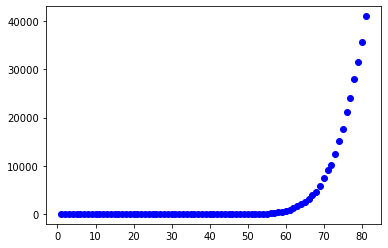

In [15]:
#Then we plot x and y to see what curve would be a good fit
plt.scatter(x, y, c ="blue")

In [16]:
#Let's try fitting and exponencial curve
ylog = np.log(y_c)

curve_fit = np.polyfit(x, ylog, 1)
print(curve_fit)

[  0.38650918 -18.07411784]


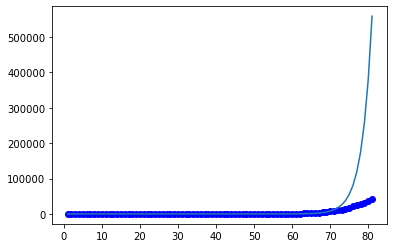

In [8]:
#Let's plot the points and the fitted curve

curve_y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*x)
plt.plot(x,curve_y)
plt.scatter(x, y, c ="blue")

In [9]:
result = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*x[-1]) - y_c[-1]
print(result)

517529.73082553083


In [12]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for the fitted curve.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = np.exp(w) * np.exp(b*x[i])    
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [17]:
print(compute_cost(x,y,curve_fit[1],curve_fit[0]))

2923724872.419412


In [ ]:
#For this model, cost seems very high. Mainly because of the last points were we see the curve is far from the points.